In [ ]:
import pandas as pd
import glob  
from datetime import datetime, date, timedelta

def get_daterange(start_date, end_date, step):
    while start_date <= end_date:
        yield start_date
        start_date += step

file_list = glob.glob('/home/ec2-user/SageMaker/MODISTerraNDVI/*.csv')

District = {'Black_Mtn_Ranch': 'NE',
   'Campo': 'ME' ,
   'Camp_Pendleton__Wheelan_Lake' : 'OC',
   'Case_Springs' : 'OC',
   'Fallbrook__Ammo_Dump' : 'NE',
   'Guejito_North': 'NE',
   'Guejito_West': 'NE',
   'Hellhole_Canyon': 'NE',
   'Highland_Valley_Rd': 'RA',
   'Honey_Springs_Rd': 'ME',
   'Mesa_Grande': 'RA',
   'Mission_Trail': 'BC',
   'Ortega_Highway': 'OC',
   'Santa_Rosa_Plateau' : 'NE',
   'Santa_Ysabel_North' : 'RA',
   'Sycamore_Canyon' :    'EA',
   'Viejas' : 'ME', 
   'Warner_Springs' :   'RA',
   'Witch_Creek' : 'RA'}

DateTable = pd.DataFrame([(x_, y_) for x_ in set(District.keys()) for y_ in get_daterange(date(2014, 1, 1), date(2021, 5, 10), 
                                                                                   timedelta(days=1))])
DateTable.columns = ['Station','Timestamp']
DateTable['District'] =  DateTable['Station'].apply(lambda x: District.get(x))
DateTable['Timestamp'] = pd.to_datetime(DateTable['Timestamp'])

In [ ]:
DateTable

In [ ]:
Ndvi= pd.DataFrame(columns=['Station','District','Timestamp','NDVI','NDVILinearInterpolation','NDVIQuadraticInterpolation'])
for file in file_list:
     
    district = District.get(file.split('/')[-1].replace('.csv',''))
    station = file.split('/')[-1].replace('.csv','')
    print(district,station)

In [ ]:
Ndvi= pd.DataFrame(columns=['Station','District','Timestamp','NDVI','NDVILinearInterpolation','NDVIQuadraticInterpolation'])
for file in file_list:
     
    district = District.get(file.split('/')[-1].replace('.csv',''))
    station = file.split('/')[-1].replace('.csv','')
    temp = pd.read_csv(file)
    temp['# timestamp'] = pd.to_datetime(temp['# timestamp'])
    temp.columns= ['Timestamp', 'NDVI']
    temp['District'] = district
    temp['Station'] = station
    print(station)
    NdviAllDates = pd.merge(DateTable.loc[DateTable['District']==district],temp,how='left',left_on=['District','Station','Timestamp'],right_on=['District','Station','Timestamp'])
    NdviAllDates['NDVILinearInterpolation'] = NdviAllDates.interpolate(method='linear',limit_direction='forward')['NDVI']
    NdviAllDates['NDVIQuadraticInterpolation'] = NdviAllDates.interpolate(method='quadratic',limit_direction='forward')['NDVI']
    Ndvi = Ndvi.append(NdviAllDates)

In [ ]:
pd.DataFrame(Ndvi.groupby(['District','Timestamp']).max())['NDVILinearInterpolation'].reset_index()

In [ ]:
Ndvi

In [ ]:
Ndvi[Ndvi['NDVILinearInterpolation'].notnull()].groupby([''])

In [ ]:
Ndvi= pd.DataFrame(columns=['District','Timestamp','NDVI','NDVILinearInterpolation','NDVIQuadraticInterpolation'])
file = file_list[0]
district = District.get(file.split('/')[-1].replace('.csv',''))
station = file.split('/')[-1].replace('.csv','')
temp = pd.read_csv(file)
temp['# timestamp'] = pd.to_datetime(temp['# timestamp'])
temp.columns= ['Timestamp', 'NDVI']
temp['District'] = district
temp['Station'] = station
print(station)
NdviAllDates = pd.merge(DateTable.loc[DateTable['District']==district],temp,how='left',left_on=['District','Station','Timestamp'],right_on=['District','Station','Timestamp'])
NdviAllDates['NDVILinearInterpolation'] = NdviAllDates.interpolate(method='linear',limit_direction='forward')['NDVI']
NdviAllDates['NDVIQuadraticInterpolation'] = NdviAllDates.interpolate(method='quadratic',limit_direction='forward')['NDVI']
Ndvi = Ndvi.append(NdviAllDates)

In [ ]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

fig = make_subplots()

fig.add_trace(
    go.Scatter(x=Ndvi[Ndvi['Station']=='Santa_Ysabel_North']['Timestamp'], y=Ndvi[Ndvi['Station']=='Santa_Ysabel_North']['NDVI'],mode="markers",name="Actual NDVI"))


fig.add_trace(
    go.Scatter(x=Ndvi[Ndvi['Station']=='Santa_Ysabel_North']['Timestamp'], y=Ndvi[Ndvi['Station']=='Santa_Ysabel_North']['NDVILinearInterpolation'],name="NDVI Linear Interpolation"),)


fig.add_trace(
    go.Scatter(x=Ndvi[Ndvi['Station']=='Santa_Ysabel_North']['Timestamp'], y=Ndvi[Ndvi['Station']=='Santa_Ysabel_North']['NDVIQuadraticInterpolation'],name="NDVI Quadratic Interpolation"))


fig.update_layout(
    title="Santa Ysabel Station NDVI Interpolation Methods over Time",
    xaxis_title="Date",
    yaxis_title="NDVI",
    legend_title="NDVI Methods",
    font=dict(
        family="Semibold",
        size=18,
        color="Grey")
    )


# # Add figure title
# fig.update_layout(
#     title_text="NDVI Interpolation Methods over Time"
# )

# fig.update_xaxes(title_text="Date")
# fig.update_yaxes(title_text="NDVI")


In [5]:
MesoWestFuel = pd.read_csv('MesoWestFuelEnhanced.csv').drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])

In [ ]:
MesoWestFuelsample = MesoWestFuel[(MesoWestFuel['Date']>'2014-01-01')&(MesoWestFuel['Date']<'2019-01-01')&(MesoWestFuel['solar_radiation_set_1'].notnull())].reset_index().drop(columns=['index'])

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
X = MesoWestFuelsample.drop(columns=['Date','Region','Station','date_time','solar_radiation_set_1','wind_cardinal_direction_set_1d'])
y = MesoWestFuelsample['solar_radiation_set_1']
X_train, X_test, y_train , y_test= train_test_split(X,y,test_size=0.2,stratify=MesoWestFuelsample['Station'])
# MeanImputation = np.repeat(np.mean(y_train),len(y_test))

In [ ]:
SetNone = [None for i in y_test]
MesoWestFuelsample['SolarRadiation'] = list(pd.concat([y_train,pd.Series(SetNone)]))

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
imp = IterativeImputer(estimator=lr,missing_values=np.nan,max_iter=100, verbose=2,imputation_order='roman',random_state=42)

# SolarRadiationMICEDF = MesoWestFuelsample[['fuel_temp_set_1','air_temp_set_1',
#        'relative_humidity_set_1', 'wind_speed_set_1','wind_gust_set_1', 'solar_radiation_set_1','precip_accum_set_1',
#        'water_temp_set_1', 'peak_wind_speed_set_1', 'fuel_moisture_set_1',
#        'peak_wind_direction_set_1']]

SolarRadiation = MesoWestFuelsample[['fuel_temp_set_1','air_temp_set_1',
       'relative_humidity_set_1', 'wind_speed_set_1','wind_gust_set_1','precip_accum_set_1',
                                     'fuel_moisture_set_1','SolarRadiation','peak_wind_speed_set_1']]


MesoWestSolarRadiationImputationDF = pd.DataFrame(imp.fit_transform(SolarRadiation))
MesoWestSolarRadiationImputationDF.columns = SolarRadiation.columns
MICESolarRadiation = MesoWestSolarRadiationImputationDF.iloc[X_test.index]['SolarRadiation']
# MeanImputationSolarRadiation = np.repeat(np.mean(y_train),len(y_test))

In [ ]:
MICESolarRadiation = MesoWestSolarRadiationImputationDF.iloc[X_test.index]['SolarRadiation']
MeanImputationSolarRadiation = np.repeat(np.mean(y_train),len(y_test))

In [ ]:
# import sklearn.metrics as metrics
# def regression_results(y_true, y_pred):

#     # Regression metrics
#     explained_variance=metrics.explained_variance_score(y_true, y_pred)
#     mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
#     mse=metrics.mean_squared_error(y_true, y_pred) 
#     mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
#     median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
#     r2=metrics.r2_score(y_true, y_pred)

#     print('explained_variance: ', round(explained_variance,4))    
#     print('mean_squared_log_error: ', round(mean_squared_log_error,4))
#     print('r2: ', round(r2,4))
#     print('MAE: ', round(mean_absolute_error,4))
#     print('MSE: ', round(mse,4))
#     print('RMSE: ', round(np.sqrt(mse),4))

In [ ]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=y_test,name="Actual Solar Radiation"))
fig.add_trace(go.Histogram(x=MICESolarRadiation,name="MICE Estimate Solar Radiation"))

fig.update_layout(barmode='overlay')

fig.update_traces(opacity=0.75)

fig.update_layout(
    title_text='Sampled 2014 to 2018 Actual NDVI over MICE Estimate Solar Radiation Distribution', # title of plot
    xaxis_title_text='Solar Radiation (Watts per square meter)', # xaxis label
    yaxis_title_text='NDVI', # yaxis label
    bargap=0.2, # gap between bars of adjacent location coordinates
    bargroupgap=0.1 # gap between bars of the same location coordinates
    ,    font=dict(
        family="Semibold",
        size=18,
        color="Grey")
)


fig.show()

In [ ]:
# regression_results(y_test,MICESolarRadiation)

In [2]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
MesoWestWind = pd.read_csv('MesoWestWindEnhanced.csv')

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (32,36,39,40,41,42,45) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


KeyboardInterrupt: 

In [ ]:
import missingno as msno
>>> %matplotlib inline

msno.bar(MesoWestFuel[['Date', 'Region', 'Station', 'date_time',
       'fuel_temp_set_1', 'air_temp_set_1',
       'relative_humidity_set_1', 'wind_speed_set_1', 
       'wind_gust_set_1', 'solar_radiation_set_1',
       'precip_accum_set_1','peak_wind_speed_set_1',
       'fuel_moisture_set_1'
                      ]])

<AxesSubplot:>

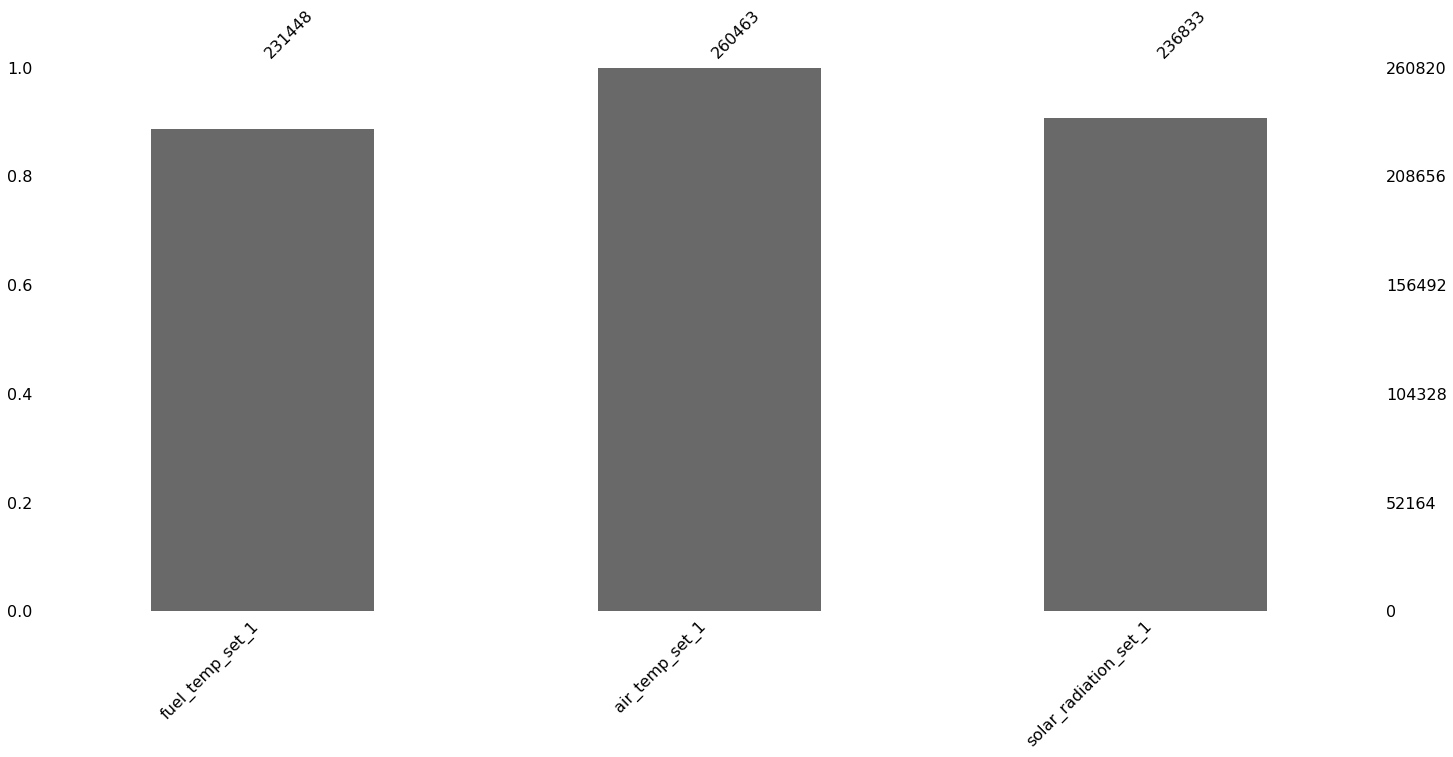

In [6]:
import missingno as msno
>>> %matplotlib inline

msno.bar(MesoWestFuel[[
       'fuel_temp_set_1', 'air_temp_set_1','solar_radiation_set_1',

                      ]])

In [ ]:
msno.bar(MesoWestWind.drop(columns=['Unnamed: 0', 'Unnamed: 0.1']))

In [ ]:
1